### Read in the Libraries and Dataset

In [1]:
# Import libraries for our task
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

import numpy as np
import pandas as pd
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [2]:
# Import system libraries and our Scripts

import os
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../script')))

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
# Read AdSmart_AB_testing_data 

data  = pd.read_csv('../data/AdSmart_AB_testing_data.csv')

## Exploratory Data Analysis (EDA) Pipeline

#### Get Information about the Data

In [5]:
# The types and shape of data features in the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [6]:
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")

 There are 8077 rows and 9 columns


In [7]:
data.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0


In [8]:
data.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [9]:
# Information about the numeric data

data.describe()

,hour,platform_os,yes,no
count,8077.00,8077.00,8077.00,8077.00
mean,11.62,5.95,0.07,0.08
std,5.73,0.22,0.26,0.28
min,0.00,5.00,0.00,0.00
25%,7.00,6.00,0.00,0.00
50%,13.00,6.00,0.00,0.00
75%,15.00,6.00,0.00,0.00
max,23.00,7.00,1.00,1.00


#### Get Information about Columns

In [10]:
data['auction_id'].nunique()

8077

In [11]:
data['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [12]:
data['yes'].value_counts()

0    7505
1     572
Name: yes, dtype: int64

In [13]:
data['no'].value_counts()

0    7406
1     671
Name: no, dtype: int64

<AxesSubplot:xlabel='yes,no'>

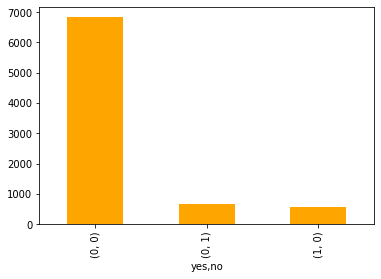

In [14]:
data[['yes','no']].value_counts().plot(kind='bar',color='orange')

In [15]:
data.groupby(['experiment']).count()

,auction_id,date,hour,device_make,platform_os,browser,yes,no
experiment,,,,,,,,
control,4071,4071,4071,4071,4071,4071,4071,4071
exposed,4006,4006,4006,4006,4006,4006,4006,4006


Since we have users who donot respond to the experiment let us remove them from our dataframe.

In [16]:
def delete_no_respond_users(df):
    cleaned_df = df.query("not (yes == 0 & no == 0)")
    return cleaned_df
    
clean_df = delete_no_respond_users(data)

In [17]:
clean_df.groupby(['experiment']).count()

,auction_id,date,hour,device_make,platform_os,browser,yes,no
experiment,,,,,,,,
control,586,586,586,586,586,586,586,586
exposed,657,657,657,657,657,657,657,657


<AxesSubplot:title={'center':'Total number of users who said Yes and No'}, xlabel='yes,no'>

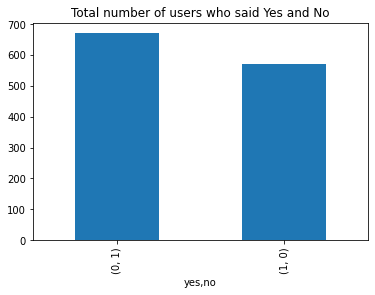

In [18]:
clean_df[['yes','no']].value_counts().plot(kind='bar', title="Total number of users who said Yes and No")

<AxesSubplot:title={'center':'Users who said Yes'}, xlabel='experiment'>

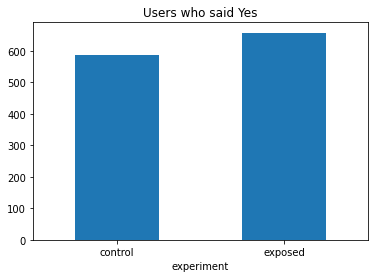

In [19]:
clean_df.groupby('experiment').count()['yes'].plot.bar(rot=0, title="Users who said Yes")

<AxesSubplot:title={'center':'Users who said No'}, xlabel='experiment'>

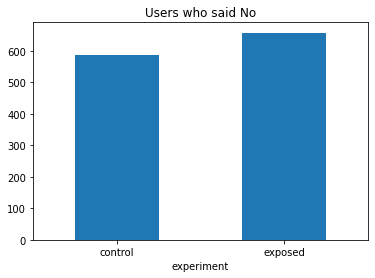

In [20]:
clean_df.groupby('experiment').count()['no'].plot.bar(rot=0, title="Users who said No")

In [21]:
clean_df.groupby(['experiment']).count()

,auction_id,date,hour,device_make,platform_os,browser,yes,no
experiment,,,,,,,,
control,586,586,586,586,586,586,586,586
exposed,657,657,657,657,657,657,657,657


In [22]:
indexNames = clean_df[(data['yes'] == 0) & (data['no'] == 0)].index
# Delete these row indexes from dataFrame
clean_df.drop(indexNames , inplace=True)

In [23]:
clean_df.groupby(['experiment']).count()

,auction_id,date,hour,device_make,platform_os,browser,yes,no
experiment,,,,,,,,
control,586,586,586,586,586,586,586,586
exposed,657,657,657,657,657,657,657,657


<AxesSubplot:xlabel='yes,no'>

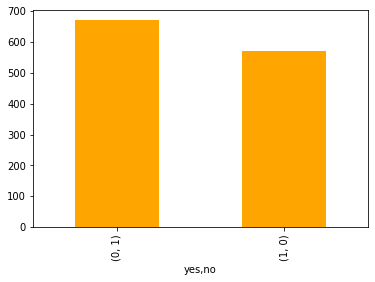

In [24]:
clean_df[['yes','no']].value_counts().plot(kind='bar',color='orange')

Find the top 5 browsers used in our dataset

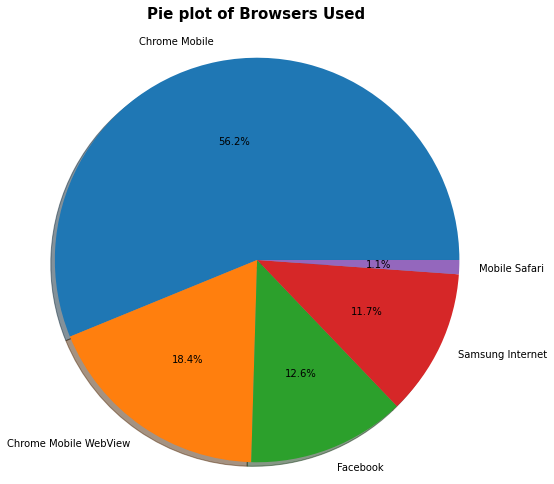

In [25]:
top_5 = clean_df['browser'].value_counts().nlargest(5)
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(top_5.values, labels=top_5.index,
        autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Pie plot of Browsers Used\n', fontsize=15, fontweight='bold')
plt.show()

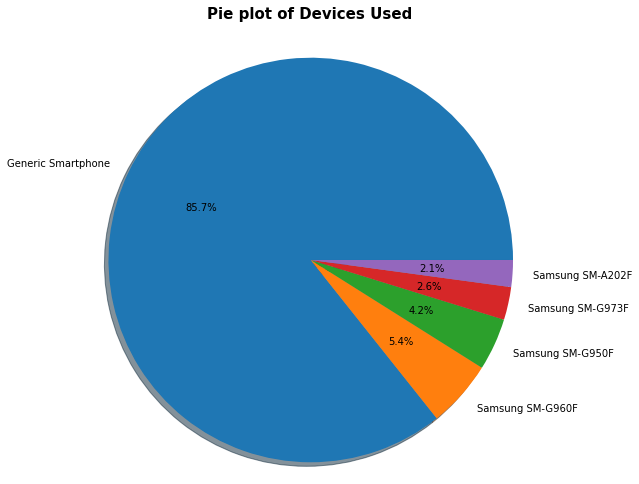

In [26]:
top_5 = clean_df['device_make'].value_counts().nlargest(5)
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(top_5.values, labels=top_5.index,
        autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Pie plot of Devices Used\n', fontsize=15, fontweight='bold')
plt.show()

#### Data Transformation

Map *yes* to *aware* column and remove *yes* and *no*

In [27]:
clean_df['aware'] = clean_df['yes'].map(lambda x: x==1)
clean_df = clean_df.drop(columns = ['yes', 'no'], axis=1)
clean_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,aware
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,False
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,True
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,False
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,True
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,False


In [28]:
# Encode aware to 0 and 1
clean_df['aware'] = clean_df['aware'].astype(int)

In [29]:
clean_df.to_csv("../data/clean_data.csv") 

### Sklearn Pipeline

In [30]:
def encode_labels(df):
    date_encoder = preprocessing.LabelEncoder()
    device_encoder = preprocessing.LabelEncoder()
    browser_encoder = preprocessing.LabelEncoder()
    experiment_encoder = preprocessing.LabelEncoder()
    aware_encoder = preprocessing.LabelEncoder()
    
    df['date'] = date_encoder.fit_transform(df['date'])
    df['device_make'] = device_encoder.fit_transform(df['device_make'])
    df['browser'] = browser_encoder.fit_transform(df['browser'])
    df['experiment'] = experiment_encoder.fit_transform(df['experiment'])
    df['browser'] = aware_encoder.fit_transform(df['browser'])
    df['aware'] = aware_encoder.fit_transform(df['aware'])
    
    return df


def feature_data(df):
    
    feature_df = df[["experiment", "hour", "date", 'device_make', 'platform_os', 'browser', 'aware']] 
    return feature_df  
    

Pipelines Creation
1. Data Preprocessing by using Standard Scaler
2. Reduce Dimension using PCA
3. Apply  Classifier

In [31]:
cleaned_data = encode_labels(clean_df)
cleaned_data = feature_data(cleaned_data)

In [32]:
cleaned_data.head()

,experiment,hour,date,device_make,platform_os,browser,aware
2,1,2,2,4,6,2,0
16,1,16,1,13,6,1,1
20,1,8,3,13,6,1,0
23,0,4,5,43,6,4,1
27,0,15,0,13,6,1,0


In [33]:
Y_col = 'aware'
X_cols = cleaned_data.loc[:, cleaned_data.columns != Y_col].columns

X_train,X_test,y_train,y_test=train_test_split(cleaned_data[X_cols], cleaned_data[Y_col],test_size=0.2, random_state=42)

In [34]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [35]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [36]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [37]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

In [38]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [39]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [40]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.5140562248995983
Decision Tree Test Accuracy: 0.5180722891566265
RandomForest Test Accuracy: 0.5341365461847389


In [41]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


#### Pipelines Perform Hyperparameter Tuning Using Grid SearchCV

In [42]:

from sklearn.model_selection import GridSearchCV

In [43]:
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [ ]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=5, max_leaf_nodes=10))])
The mean accuracy of the model is: 0.5542168674698795


### MakePipelines In SKLearn

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
# Create a pipeline
pipe = make_pipeline((RandomForestClassifier()))
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__n_estimators": [10, 100, 1000],
                 "randomforestclassifier__max_depth":[5,8,15,25,30,None],
                 "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,100],
                 "randomforestclassifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [ ]:
best_model.score(X_test,y_test)

0.5381526104417671